In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

# ALGORITMO DE CODIFICACIÓN SUPERDENSA

In [2]:
crA = ClassicalRegister(2,'bitsAlice')
qr = QuantumRegister(2,'qr')
crB = ClassicalRegister(2,'bitsBob')
qc = QuantumCircuit(crA,qr,crB)

### Preparación de estado
* El algoritmo precisa de un par entrelazado

In [3]:
qc.h(qr[0])
qc.cx(qr[0],qr[1])

qc.barrier(qr)

### Codificación
Para codificar el par de bits, Alice interactura de distintas maneras sobre su mitad del par entrelazado según lo que quiera enviar
* 00 -> no hace nada
* 01 -> aplica Z a su cubit
* 10 -> aplica X a su cubit
* 11 -> aplica iY a su cubit (esto es equivalente a aplicar X y luego Z)

Una vez hecho esto Alice envia su cubit a Bob

In [4]:
with qc.if_test((crA[1],1)):
    qc.x(qr[0])
with qc.if_test((crA[0],1)):
    qc.z(qr[0])

qc.barrier(qr)

Por ultimo, cuando Bob ya tiene el par entrelazado completo, puede decodificarlo aplicando un CNOT y luego un H, generando un estado que siempre colapsara al par de bits que Alice quería mandar 

In [5]:
qc.cx(qr[0],qr[1])
qc.h(qr[0])

qc.barrier(qr)

qc.measure(qr[0],crB[0])
qc.measure(qr[1],crB[1])

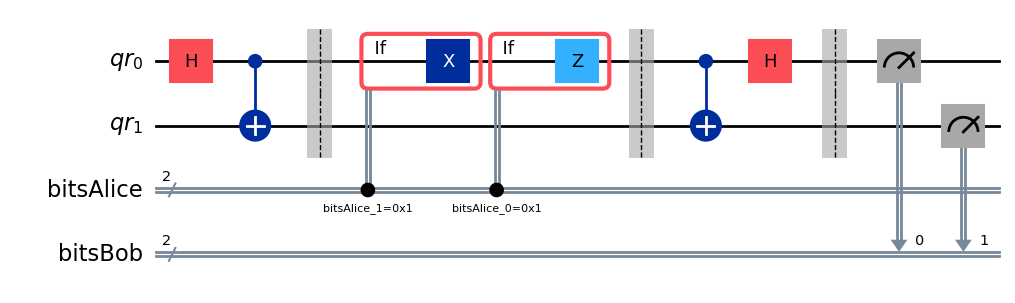

In [6]:
qc.draw("mpl")

# ALGORITMO DE TELETRANSPORTACIÓN

In [7]:
qr = QuantumRegister(3, 'qr')
cr = ClassicalRegister(2, 'cr')
qc = QuantumCircuit(qr, cr)

### Preparación de estado

*   Generamos el par entrelazado de Alice y Bob
*   Generamos un cubit arbitrario para teletransportar

In [8]:
# cubit arbitrario
qc.u(pi / 4, 0, 0, qr[0])

qc.barrier(qr)

# par entrelazado
qc.h(qr[1])
qc.cx(qr[1], qr[2])

qc.barrier(qr)

### Interacción de Alice

* Alice interacciona su mitad del par con el cubit a teletransportar
* Alice colapsa los cubits y envía lo observado a Bob


In [9]:
# interacción
qc.cx(qr[0], qr[1])
qc.h(qr[0])

qc.barrier(qr)

# medición
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

### Recuperación de Bob

* Leyendo los bits que envía Alice, Bob puede recuperar el cubit arbitrario


In [10]:
with qc.if_test((cr[0],1)):
    qc.z(qr[2])
with qc.if_test((cr[1],1)):
    qc.x(qr[2])

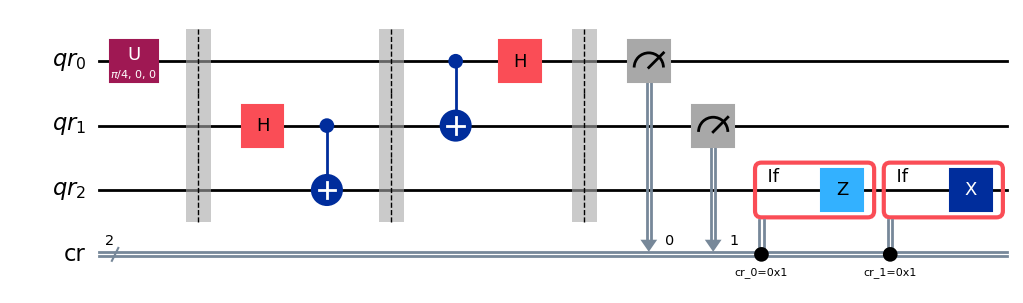

In [11]:
qc.draw("mpl")